<a href="https://colab.research.google.com/github/wjunior83/statsmodels/blob/master/Lista_Python2_Multiplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
salario = pd.read_excel('/content/salario_python.xlsx')
salario.head()

,id,salbeg,time,age,edlevel
0,628,8400,81,28.50,16
1,630,24000,73,40.33,16
2,632,10200,83,31.08,15
3,633,8700,93,31.17,16
4,635,17400,83,41.92,19


In [3]:
salario = salario[['salbeg','time','age','edlevel']]

In [4]:
salario.describe()

,salbeg,time,age,edlevel
count,474.000000,474.000000,474.000000,474.000000
mean,6806.434599,81.109705,37.186139,13.491561
std,3148.255262,10.060945,11.787242,2.884846
min,3600.000000,63.000000,23.000000,8.000000
25%,4995.000000,72.000000,28.500000,12.000000
50%,6000.000000,81.000000,32.000000,12.000000
75%,6996.000000,90.000000,45.980000,15.000000
max,31992.000000,98.000000,64.500000,21.000000


In [5]:
#variável "edlevel" tem correlação de moderada para forte, pois é a que mais se aproxima de 1
salario.corr()

,salbeg,time,age,edlevel
salbeg,1.000000,-0.019753,-0.011040,0.633196
time,-0.019753,1.000000,0.051630,0.047379
age,-0.011040,0.051630,1.000000,-0.280842
edlevel,0.633196,0.047379,-0.280842,1.000000


In [7]:
# modelo utilizando todas as variáveis
x = salario[['time','age','edlevel']]
x.head()

,time,age,edlevel
0,81,28.50,16
1,73,40.33,16
2,83,31.08,15
3,93,31.17,16
4,83,41.92,19


In [8]:
x = sm.add_constant(x)
x.head()

,const,time,age,edlevel
0,1.0,81,28.50,16
1,1.0,73,40.33,16
2,1.0,83,31.08,15
3,1.0,93,31.17,16
4,1.0,83,41.92,19


In [9]:
y = salario['salbeg']
y.head()

0     8400
1    24000
2    10200
3     8700
4    17400
Name: salbeg, dtype: int64

In [10]:
modelo = sm.OLS(y,x)

In [11]:
ajuste = modelo.fit()

In [12]:
ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salbeg   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           6.31e-58
Time:                        01:29:53   Log-Likelihood:                -4354.7
No. Observations:                 474   AIC:                             8717.
Df Residuals:                     470   BIC:                             8734.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3596.1771   1100.100     -3.269      0.001   -5757.901   -1434.454
time         -19.3803     10.887     -1.780      0.076     -40.774       2.013
age           49.5278      9.671      5.121      0.000      30.523      68.532
edlevel      751.0466     39.508     19.010      0.000     673.411     828.682
==============================================================================
Omnibus:                      330.952   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6268.054
Skew:                           2.752   Prob(JB):                         0.00
Kurtosis:                      19.943   Cond. No.                         917.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# y = a + b1*x1 + b2*x2 + b3*x3
# previsao2 = a + b1 inclinacao * time + b2 inclinacao * age + b3 inclinacao * edlevel
previsao2 = (-3596.1771) + (-19.3803) * 100 + 49.5278 * 40 + 751.0466 * 20
previsao2

11467.836900000002

In [13]:
previsao = modelo.predict(ajuste.params)
previsao

array([ 8262.30971476,  9003.26557933,  7600.28436311,  8161.98590875,
       11141.35195256,  9833.31089565,  7525.25975473,  7794.96862901,
        7167.06934524,  6545.11328224,  7700.76138147,  6401.76470324,
        8970.48471961,  7809.31605982, 11014.2987663 ,  5885.29858452,
       10626.88695615,  7892.21633532,  9210.27985525,  9139.13687611,
        8445.48623672,  8553.89962135, 11919.50998472,  8547.62985053,
       11382.72117043, 10651.84408815,  9057.30719814,  6263.75099043,
        9653.31174632,  7641.73450086,  7506.61241433, 10508.20155608,
        9281.64373165,  5438.12260212, 10792.50303373,  5117.42448643,
       10761.13167827,  7630.77835417,  4057.93281763,  5710.67870204,
        7311.19523666,  7499.96055709,  7912.13626612,  8287.95973775,
        8137.22200988,  8312.03074564,  3925.30713139,  7502.65019051,
        5290.42533302,  8376.6345061 ,  7647.99989182,  8282.76932418,
        7669.3412455 ,  8085.4835582 , 10339.89146521, 11268.7916051 ,
      

In [14]:
salario['previsao'] = previsao
salario.head()

,salbeg,time,age,edlevel,previsao
0,8400,81,28.50,16,8262.309715
1,24000,73,40.33,16,9003.265579
2,10200,83,31.08,15,7600.284363
3,8700,93,31.17,16,8161.985909
4,17400,83,41.92,19,11141.351953


In [15]:
salario['erro'] = salario.salbeg - salario.previsao
salario.head()

,salbeg,time,age,edlevel,previsao,erro
0,8400,81,28.50,16,8262.309715,137.690285
1,24000,73,40.33,16,9003.265579,14996.734421
2,10200,83,31.08,15,7600.284363,2599.715637
3,8700,93,31.17,16,8161.985909,538.014091
4,17400,83,41.92,19,11141.351953,6258.648047


In [16]:
salario.describe()

,salbeg,time,age,edlevel,previsao,erro
count,474.000000,474.000000,474.000000,474.000000,474.000000,4.740000e+02
mean,6806.434599,81.109705,37.186139,13.491561,6806.434599,-1.695229e-11
std,3148.255262,10.060945,11.787242,2.884846,2076.288919,2.366545e+03
min,3600.000000,63.000000,23.000000,8.000000,1888.208800,-5.409611e+03
25%,4995.000000,72.000000,28.500000,12.000000,5236.663282,-1.339892e+03
50%,6000.000000,81.000000,32.000000,12.000000,6869.638898,-4.729313e+02
75%,6996.000000,90.000000,45.980000,15.000000,8181.818133,7.514690e+02
max,31992.000000,98.000000,64.500000,21.000000,13277.078839,2.072321e+04


{'boxes': [<matplotlib.lines.Line2D at 0x7f51ea588860>],
 'caps': [<matplotlib.lines.Line2D at 0x7f51ea59d2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f51ea59dd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f51ea59d9b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f51ea588b70>,
  <matplotlib.lines.Line2D at 0x7f51ea588ef0>]}

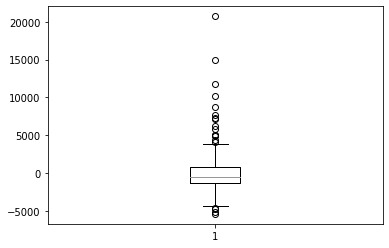

In [17]:
plt.boxplot(salario.erro)